In [48]:
import graph_tool.all as gt
import networkx as nx
from nx2gt import nx2gt
import pickle
import numpy as np

## Data import

In [37]:
g_true = gt.load_graph_from_csv('data/weeplace_friends.csv', skip_first=True, directed=False, hashed=True)

In [38]:
g_threshold = gt.load_graph_from_csv('data/weeplace_artifical_friend_threshold_gt.csv', skip_first=True, directed=False, hashed=True)

In [39]:
g_all = gt.load_graph_from_csv('data/weeplace_artifical_friend_all_gt.csv', skip_first=True, directed=False, hashed=True)

## Network visualisation

### True friendship network

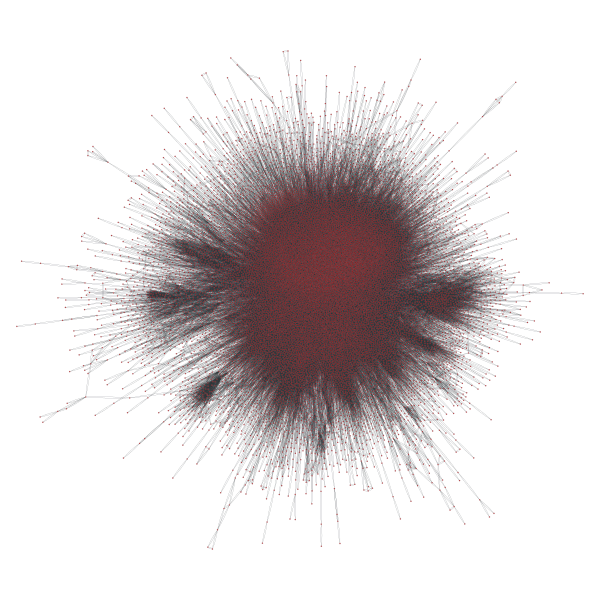

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad4a6d94a8, at 0x7fad5857edd8>

In [40]:
# true friendship network
gt.graph_draw(g_true)

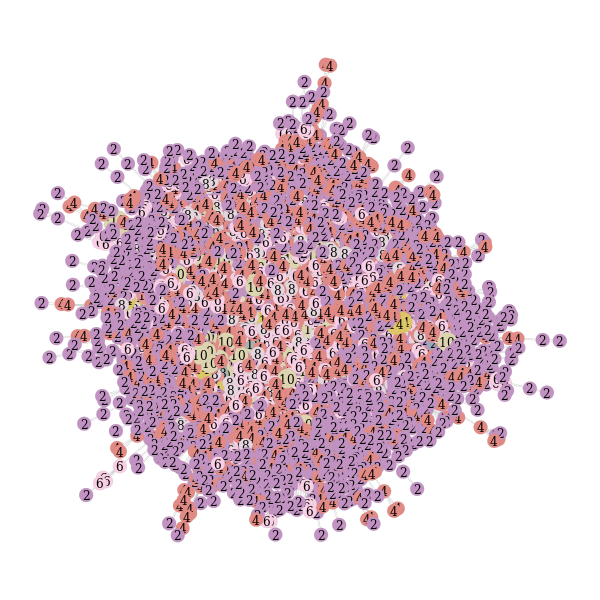

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad4a6d94a8, at 0x7fad530c1a58>

In [46]:
kcore_true = gt.kcore_decomposition(g_true)
gt.graph_draw(g_true, vertex_fill_color=kcore_true, vertex_text=kcore_true)

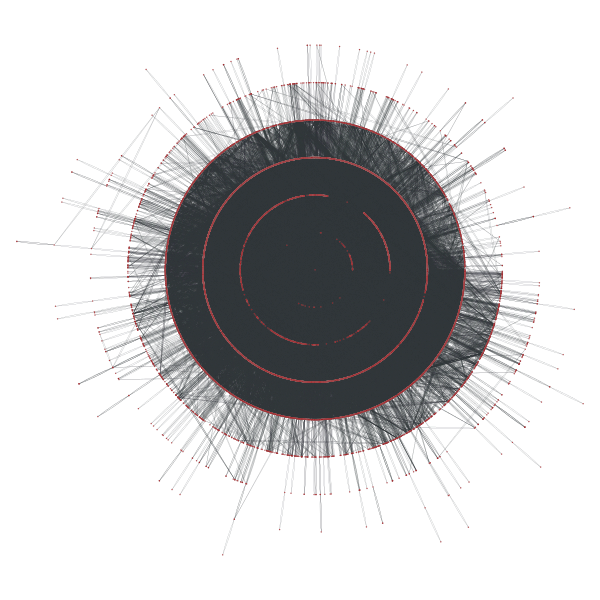

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad4a6d94a8, at 0x7fad52f88860>

In [52]:
pos_true = gt.radial_tree_layout(g_true, g_true.vertex(0))
gt.graph_draw(g_true, pos=pos_true)

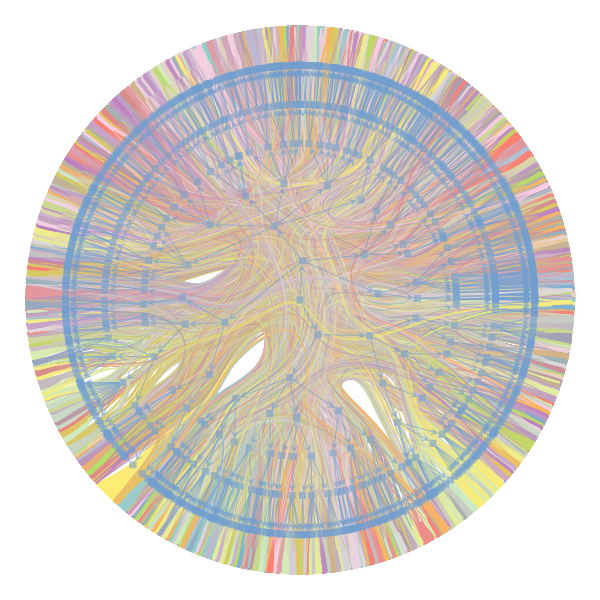

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad4a6d94a8, at 0x7fad4a4272e8>,
 <Graph object, directed, with 17039 vertices and 17038 edges at 0x7fad4a3ef6a0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad4a3ef6a0, at 0x7fad4a4274e0>)

In [55]:
state_true = gt.minimize_nested_blockmodel_dl(g_true, deg_corr=True)
gt.draw_hierarchy(state_true)

### Artifical Friendship Network (defined by part of meetup alters)

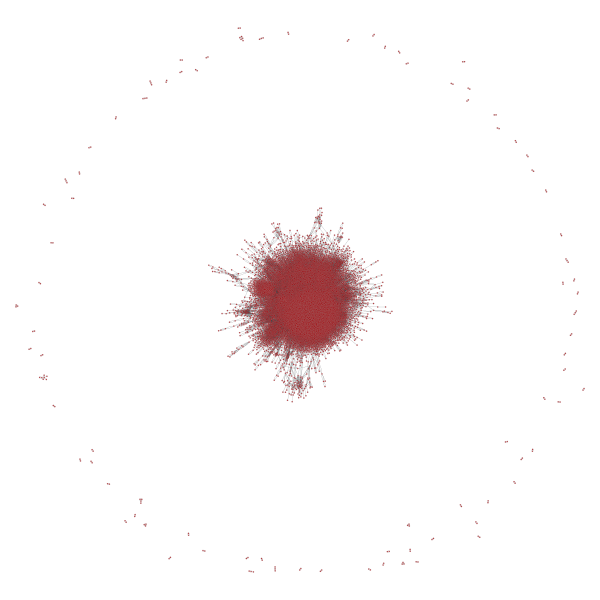

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad530c14e0, at 0x7fad5917e780>

In [41]:
gt.graph_draw(g_threshold)

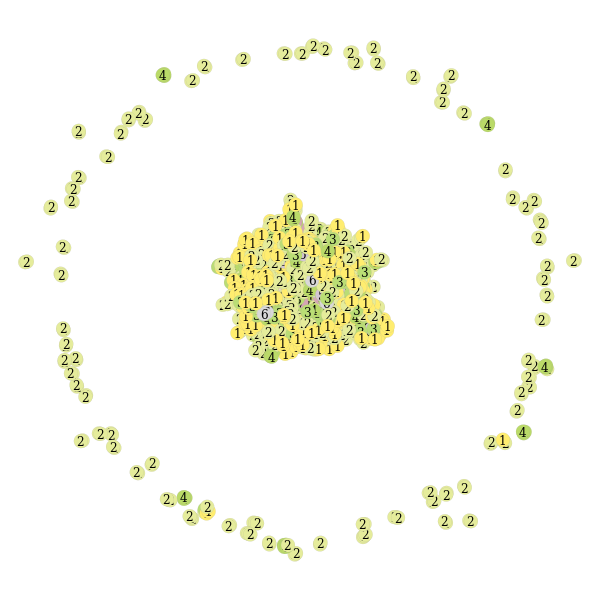

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad530c14e0, at 0x7fad5311d588>

In [50]:
kcore_threshold = gt.kcore_decomposition(g_threshold)
gt.graph_draw(g_threshold, vertex_fill_color=kcore_threshold, vertex_text=kcore_threshold)

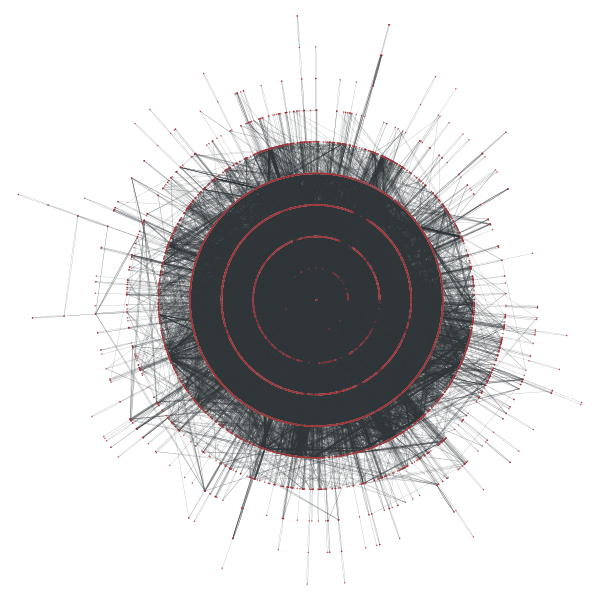

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad530c14e0, at 0x7fad4a4b6e10>

In [53]:
pos_threshold = gt.radial_tree_layout(g_threshold, g_threshold.vertex(0))
gt.graph_draw(g_threshold, pos=pos_threshold)

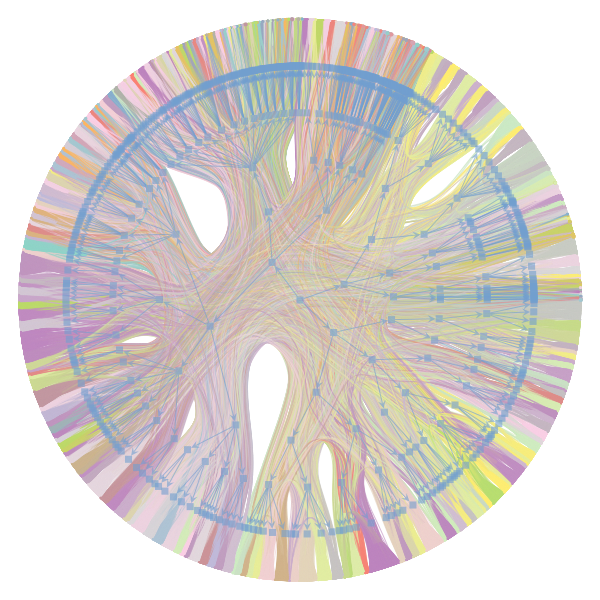

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad530c14e0, at 0x7fad5857e7f0>,
 <Graph object, directed, with 14936 vertices and 14935 edges at 0x7fad4a37a908>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad4a37a908, at 0x7fad4a502f98>)

In [56]:
state_threshold = gt.minimize_nested_blockmodel_dl(g_threshold, deg_corr=True)
gt.draw_hierarchy(state_threshold)

### Artifical Friendship Network (defined by all of meetup alters)

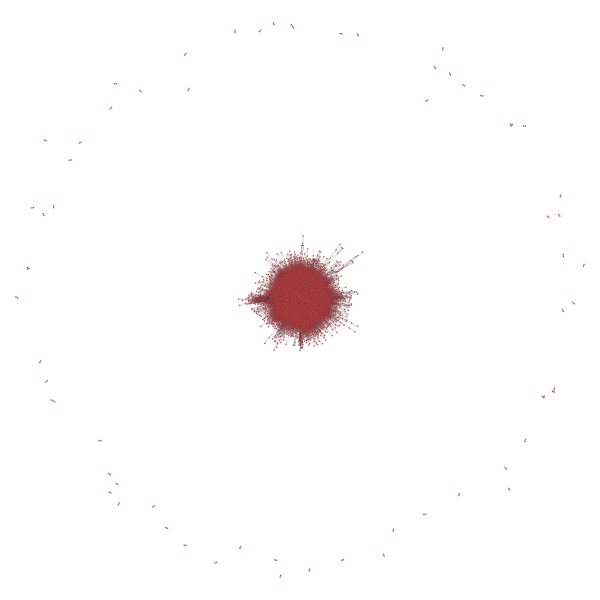

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad5857eda0, at 0x7fad4a686550>

In [42]:
gt.graph_draw(g_all)

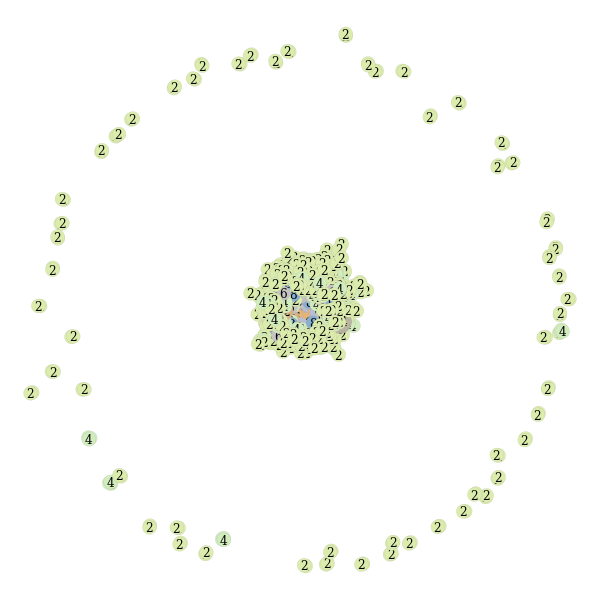

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad5857eda0, at 0x7fad5858eeb8>

In [51]:
kcore_all = gt.kcore_decomposition(g_all)
gt.graph_draw(g_all, vertex_fill_color=kcore_all, vertex_text=kcore_all)

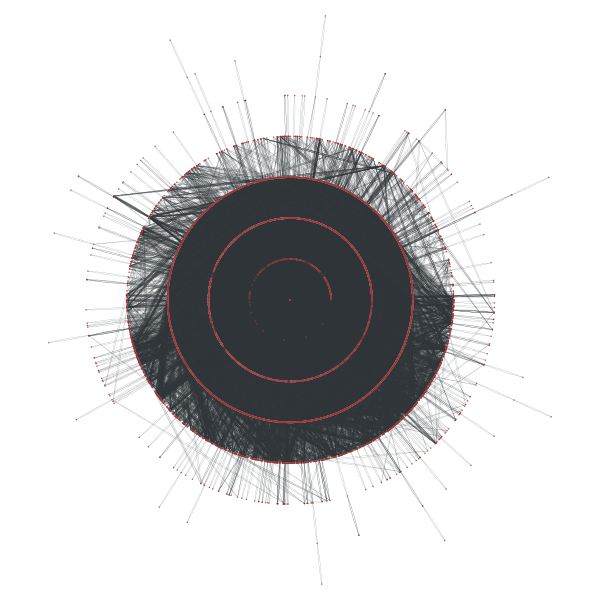

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad5857eda0, at 0x7fad4a48c860>

In [54]:
pos_all = gt.radial_tree_layout(g_all, g_all.vertex(0))
gt.graph_draw(g_all, pos=pos_all)

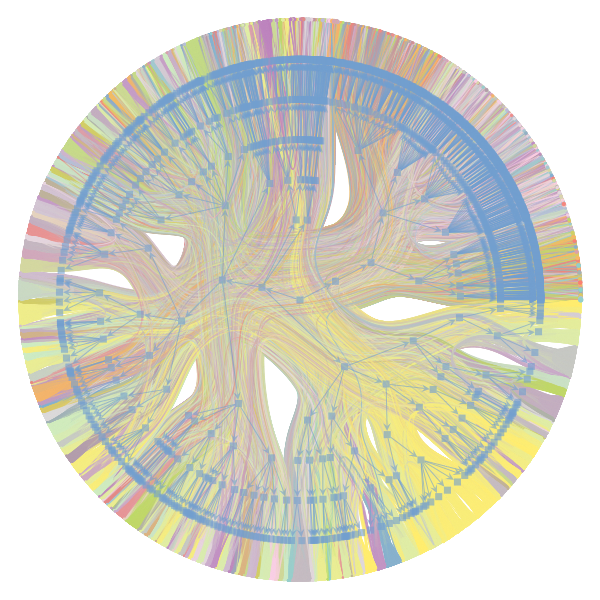

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad5857eda0, at 0x7fad4a32b278>,
 <Graph object, directed, with 15758 vertices and 15757 edges at 0x7fad4a502630>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fad4a502630, at 0x7fad4a502b00>)

In [57]:
state_all = gt.minimize_nested_blockmodel_dl(g_all, deg_corr=True)
gt.draw_hierarchy(state_all)

In [34]:
# print(g2.vp.keys())
# print(g2.ep.keys())
# print([g2.vp['name'][v] for v in g2.get_vertices()])

## Compare with different friendship network

In its default parametrization, the adjacency similarity is the sum of equal non-zero entries in the adjacency matrix, given a vertex ordering determined by the vertex labels. In other words, it counts the number of edges which have the same source and target labels in both graphs. This function also allows for generalized similarities according to an $L^p$ norm, for arbitrary p.

In [43]:
print(gt.similarity(g_true,g_all,p=1), gt.similarity(g_true,g_threshold,p=1), gt.similarity(g_threshold,g_all,p=1))

0.008505080190397247 0.009080255219410565 0.013178097513854289


In [44]:
print(gt.similarity(g_true,g_all,p=2), gt.similarity(g_true,g_threshold,p=2), gt.similarity(g_threshold,g_all,p=2))

0.9984218810372317 0.9971980719162166 0.9984366189294781
